# Explore the outcome of a hyperparameter sweep for metric correlation between datasets

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
import sys

pd.options.display.max_colwidth = None
MODULE_PATH =  Path(os.getcwd()).parents[1].resolve()

In [2]:
%cd {MODULE_PATH}

/home/shaul/workspace/GitHub/SOTA


In [3]:
path_combined = 'combined_dataset.csv'
path_sts = 'sts.csv'
path_qqp = 'qqp.csv'
path_sample_qqp = 'sample_qqp.csv'
report_file = "wandb_total_experiment.csv"

PATH_DATA = MODULE_PATH / 'data'
PATH_COMBINED = PATH_DATA / 'datasets' / path_combined
PATH_STS = PATH_DATA / 'datasets' / path_sts
PATH_SAMPLE_QQP = PATH_DATA / 'datasets' / path_sample_qqp

In [4]:
df = pd.read_csv(PATH_DATA / 'reports' / report_file, index_col="Name")

all_metrics = df.metrics.unique()

# 0 = ALL, 1 = Top 3, 2 = Top 4
df_all_metrics = df[df.metrics == all_metrics[0]]
df_top4_metrics = df[df.metrics == all_metrics[1]]
df_top3_metrics = df[df.metrics == all_metrics[2]]
# df['RF Increase'] = df['RF PearsonR'] - df['Base Top Correlation']
# df['RF Increase Percentage'] = df['RF Increase'] / df['Base Top Correlation']

# Each metric with itself

In [9]:
df = df_all_metrics

train_dataset = path_combined
filtered = True


if filtered:
    display(df[(df['train_dataset'] == train_dataset) & (df['test_dataset'].isnull()) & (~df['bad_annotators'].isnull())] \
    .sort_values(by="RF Increase",ascending=False)[:3])
else:
    display(df[(df['train_dataset'] == train_dataset) & (df['test_dataset'].isnull()) & (df['bad_annotators'].isnull())] \
    .sort_values(by="RF Increase",ascending=False)[:3])

,bad_annotators,metrics,rf_depth,rf_top_n_features,scale_features,scale_labels,test_dataset,train_dataset,Base Top Correlation,RF PearsonR,RF Increase,RF Increase Percentage
Name,,,,,,,,,,,,
eager-energy-1342,ba_all.txt,"[""bleu"",""bleu1"",""glove_cosine"",""fasttext_cosine"",""BertScore"",""chrfScore"",""POS Dist score"",""1-gram_overlap"",""ROUGE-1"",""ROUGE-2"",""ROUGE-l"",""L2_score"",""WMD""]",8,NaN,False,False,NaN,combined_dataset.csv,0.56437,0.610011,0.045642,0.080872
chocolate-river-1293,ba_all.txt,"[""bleu"",""bleu1"",""glove_cosine"",""fasttext_cosine"",""BertScore"",""chrfScore"",""POS Dist score"",""1-gram_overlap"",""ROUGE-1"",""ROUGE-2"",""ROUGE-l"",""L2_score"",""WMD""]",6,NaN,True,False,NaN,combined_dataset.csv,0.56437,0.609950,0.045580,0.080762
grateful-totem-1328,ba_all.txt,"[""bleu"",""bleu1"",""glove_cosine"",""fasttext_cosine"",""BertScore"",""chrfScore"",""POS Dist score"",""1-gram_overlap"",""ROUGE-1"",""ROUGE-2"",""ROUGE-l"",""L2_score"",""WMD""]",6,NaN,False,False,NaN,combined_dataset.csv,0.56437,0.609875,0.045505,0.080629


In [13]:
train_dataset = path_sample_qqp

display(df[(df['train_dataset'] == train_dataset) & (df['test_dataset'].isnull())].sort_values(by="RF Increase",ascending=False)[:3])

,bad_annotators,metrics,rf_depth,rf_top_n_features,scale_features,scale_labels,test_dataset,train_dataset,Base Top Correlation,RF PearsonR,RF Increase,RF Increase Percentage
Name,,,,,,,,,,,,
silvery-butterfly-890,NaN,"[""bleu"",""bleu1"",""glove_cosine"",""fasttext_cosine"",""BertScore"",""chrfScore"",""POS Dist score"",""1-gram_overlap"",""ROUGE-1"",""ROUGE-2"",""ROUGE-l"",""L2_score"",""WMD""]",9,NaN,True,False,NaN,sample_qqp.csv,0.438372,0.565818,0.127446,0.290725
silver-dawn-945,NaN,"[""bleu"",""bleu1"",""glove_cosine"",""fasttext_cosine"",""BertScore"",""chrfScore"",""POS Dist score"",""1-gram_overlap"",""ROUGE-1"",""ROUGE-2"",""ROUGE-l"",""L2_score"",""WMD""]",9,NaN,False,False,NaN,sample_qqp.csv,0.438372,0.564425,0.126052,0.287547
denim-disco-933,NaN,"[""bleu"",""bleu1"",""glove_cosine"",""fasttext_cosine"",""BertScore"",""chrfScore"",""POS Dist score"",""1-gram_overlap"",""ROUGE-1"",""ROUGE-2"",""ROUGE-l"",""L2_score"",""WMD""]",8,NaN,False,False,NaN,sample_qqp.csv,0.438372,0.560288,0.121916,0.278111


In [14]:
train_dataset = path_sts

display(df[(df['train_dataset'] == train_dataset) & (df['test_dataset'].isnull())].sort_values(by="RF Increase",ascending=False)[:3])

,bad_annotators,metrics,rf_depth,rf_top_n_features,scale_features,scale_labels,test_dataset,train_dataset,Base Top Correlation,RF PearsonR,RF Increase,RF Increase Percentage
Name,,,,,,,,,,,,
unique-firebrand-145,NaN,"[""bleu"",""bleu1"",""glove_cosine"",""fasttext_cosine"",""BertScore"",""chrfScore"",""POS Dist score"",""1-gram_overlap"",""ROUGE-1"",""ROUGE-2"",""ROUGE-l"",""L2_score"",""WMD""]",9,NaN,False,False,NaN,sts.csv,0.707256,0.781490,0.074234,0.104961
twilight-feather-138,NaN,"[""bleu"",""bleu1"",""glove_cosine"",""fasttext_cosine"",""BertScore"",""chrfScore"",""POS Dist score"",""1-gram_overlap"",""ROUGE-1"",""ROUGE-2"",""ROUGE-l"",""L2_score"",""WMD""]",8,NaN,False,False,NaN,sts.csv,0.707256,0.780856,0.073600,0.104064
giddy-valley-110,NaN,"[""bleu"",""bleu1"",""glove_cosine"",""fasttext_cosine"",""BertScore"",""chrfScore"",""POS Dist score"",""1-gram_overlap"",""ROUGE-1"",""ROUGE-2"",""ROUGE-l"",""L2_score"",""WMD""]",9,NaN,True,False,NaN,sts.csv,0.707256,0.780600,0.073344,0.103702


## Find the cases where the RF Increase is the highest between datasets

In [17]:
df = df_top4_metrics

train_dataset = path_combined
test_dataset = path_sts
filtered = False

if filtered:
    display(df[(df['train_dataset'] == train_dataset) & (df['test_dataset'] == test_dataset) & (~df['bad_annotators'].isnull())] \
    .sort_values(by="RF Increase",ascending=False)[:3])
else:
    display(df[(df['train_dataset'] == train_dataset) & (df['test_dataset'] == test_dataset) & (df['bad_annotators'].isnull())] \
    .sort_values(by="RF Increase",ascending=False)[:3])

,bad_annotators,metrics,rf_depth,rf_top_n_features,scale_features,scale_labels,test_dataset,train_dataset,Base Top Correlation,RF PearsonR,RF Increase,RF Increase Percentage
Name,,,,,,,,,,,,
colorful-frog-1581,NaN,"[""WMD"",""BertScore"",""POS Dist score"",""fasttext_cosine""]",5,NaN,True,False,sts.csv,combined_dataset.csv,0.705798,0.568552,-0.137245,-0.194454
desert-sun-1616,NaN,"[""WMD"",""BertScore"",""POS Dist score"",""fasttext_cosine""]",5,NaN,False,False,sts.csv,combined_dataset.csv,0.705798,0.563322,-0.142476,-0.201865
grateful-wave-1623,NaN,"[""WMD"",""BertScore"",""POS Dist score"",""fasttext_cosine""]",6,NaN,False,False,sts.csv,combined_dataset.csv,0.705798,0.545150,-0.160647,-0.227611


## Visualize how the RF changes overall

In [34]:
df = df_top3_metrics

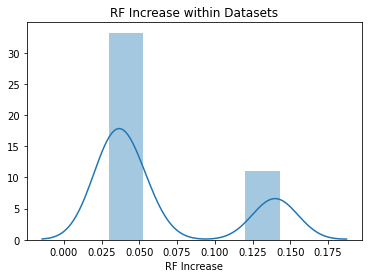

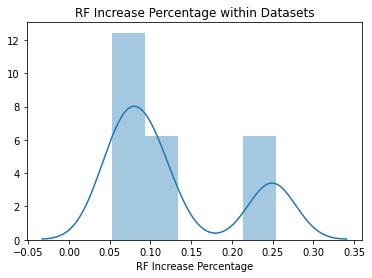

In [35]:
sns.distplot(df[df['test_dataset'].isnull()]['RF Increase']);
plt.title("RF Increase within Datasets")
plt.show()
sns.distplot(df[df['test_dataset'].isnull()]['RF Increase Percentage']);
plt.title("RF Increase Percentage within Datasets")
plt.show();

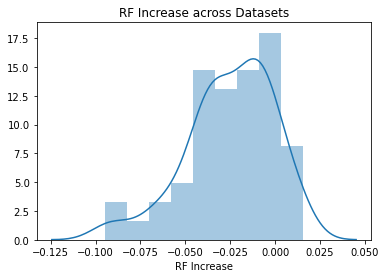

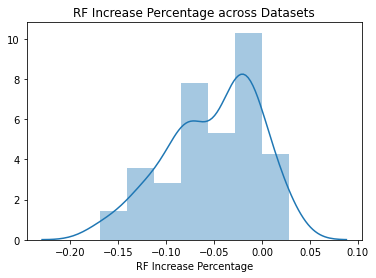

In [36]:
sns.distplot(df[df['test_dataset'].notnull()]['RF Increase']);
plt.title("RF Increase across Datasets")
plt.show()
sns.distplot(df[df['test_dataset'].notnull()]['RF Increase Percentage']);
plt.title("RF Increase Percentage across Datasets")
plt.show();

In [39]:
idx = df[df['test_dataset'].notnull()]['RF Increase'].sort_values(ascending=False)[:5].index
display(df.loc[idx])

,bad_annotators,metrics,rf_depth,rf_top_n_features,scale_features,scale_labels,test_dataset,train_dataset,Base Top Correlation,RF PearsonR,RF Increase,RF Increase Percentage
Name,,,,,,,,,,,,
earnest-brook-969,NaN,"[""WMD"",""BertScore"",""POS Dist score""]",6,NaN,True,False,sts.csv,sample_qqp.csv,0.559462,0.574987,0.015525,0.027749
cosmic-shape-1042,NaN,"[""WMD"",""BertScore"",""POS Dist score""]",7,NaN,False,False,sts.csv,sample_qqp.csv,0.559462,0.572912,0.013450,0.024041
charmed-donkey-1030,NaN,"[""WMD"",""BertScore"",""POS Dist score""]",6,NaN,False,False,sts.csv,sample_qqp.csv,0.559462,0.572542,0.013080,0.023379
curious-silence-982,NaN,"[""WMD"",""BertScore"",""POS Dist score""]",7,NaN,True,False,sts.csv,sample_qqp.csv,0.559462,0.571073,0.011611,0.020753
sparkling-leaf-1056,NaN,"[""WMD"",""BertScore"",""POS Dist score""]",8,NaN,False,False,sts.csv,sample_qqp.csv,0.559462,0.569478,0.010016,0.017903


## Exploring transferability from Combined to other datasets based off filtering

In [57]:
df = df_top4_metrics

In [58]:
df['bad_annotators'] = df.bad_annotators.fillna("Empty")
df.groupby(['bad_annotators','test_dataset'])[['RF Increase', 'RF Increase Percentage']].agg(['mean','max'])

RF Increase            \
                                           mean       max   
bad_annotators test_dataset                                 
Empty          combined_dataset.csv   -0.006221 -0.002056   
               sample_qqp.csv         -0.021829 -0.004154   
               sts.csv                -0.098926 -0.019600   
ba_all.txt     combined_dataset.csv   -0.020524 -0.016621   
               sample_qqp.csv         -0.058020 -0.046917   
               sts.csv                -0.202442 -0.161254   

                                    RF Increase Percentage            
                                                      mean       max  
bad_annotators test_dataset                                           
Empty          combined_dataset.csv              -0.014622 -0.004832  
               sample_qqp.csv                    -0.049673 -0.009454  
               sts.csv                           -0.140162 -0.027770  
ba_all.txt     combined_dataset.csv              -0.036164 -0.029287  
               sample_qqp.csv                    -0.132027 -0.106761  
               sts.csv                           -0.286827 -0.228471